

# Project:  Wrangling, analyzing and visualizing of WeRateDog data




## Table of Contents

<a href="#intro">Introduction</a>

<a href="#Gathering">Gathering data</a> 
    <ul>
    <li><a href="#archive">Twitter archive data</a></li>
    <li><a href="#image_pred">Image Prediction data</a></li>
    <li><a href="#json">Additional api data(tweet_json)</a></li>
    <ul>  

<a href="#Assessing">Assessing data</a>
    <ul>
    <li><a href="#archive2">Twitter archive data</a></li>
    <li><a href="#image_pred2">Image Prediction data</a></li>
    <li><a href="#json2">Additional api data(tweet_json)</a></li>
    <li><a href="#summary">Assessing summary</a></li>
    <ul>


<a href="#Cleaning">Cleaning data</a>
    <ul>
    <li><a href="#quality">Quality Issues</a></li>
    <li><a href="#tidiness">Tidiness Issues</a></li>
    <ul>


<a href="#Storing">Storing data</a>

<a href="#Analyzing">Analyzing</a>

<a id='intro'></a>
# Introduction

> This project is a wrangling and analyzing process of WerateDog data.The dataset is gotten from WerateDog twitter archive(provide to Udacity), a tsv file for image prediction on udacity(downloaded programmatically), and additional data downloaded via twitter api. The major task in this project is wrangling, while analysis and visualization comes after the cleaning process.


# Gathering




<a id='archive'></a>
### Gathering Twitter archive data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import tweepy
from PIL import Image
from io import BytesIO

In [2]:
#twitter-archive-enhanced.csv
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='image_pred'></a>
### Gathering image prediction data

In [3]:
# extacting download url to a variable and pass into the request get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# writing to image_predictions.tsv in root folder
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)


In [4]:
image_pred = pd.read_csv("image_predictions.tsv", sep= "\t")

# verify
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='json'></a>
### Gathering additional data from twitter api(tweet_json)

In [5]:
# setting twitter auth with an elevated status access token

consumer_key = '7JpobYOo6e2Eu4ev4cZwnrz7X'
consumer_secret = '1qgU48ZsBZR6GGPTjAVwGWdAawIUMatZJNFzZzRslvMpYHHUtg'
access_token = '142641639-F7EqbbYTHF75UR0390KjqJtmOcnFTSfnLMiSBSpb'
access_secret = 'LArhAjfZtVTUoJwrRlTgGjdq7ATfHQwKvMEH9FuxV5nX7'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# setting an instance of the api
# note that the tweepy library no longer have the wait_on_rate_limit_notify param
# it seems to be on a default true
api = tweepy.API(auth = auth, 
                 wait_on_rate_limit = True)



In [6]:
# getting additional data from tweeter api using a loop 
#and appending per id into a list

json_list = []
error = []
count = 0



for id in twitter_archive.tweet_id.values:
    
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        status = api.get_status(id, tweet_mode = 'extended')
        json_list.append(status._json)
        if count % 200 == 0:
            print('Success at ' + str(count) + ' iteration(s)')
    except:         
        # save the id with error to the error dictionary
        if count % 50 == 0:
            print(str(id) + 'failed at ' + str(count) + ' iteration(s)')
        error.append(id)
        pass



print('Completed: ' + str(len(json_list)))
print('Failed: ' + str(len(error)))



Success at 200 iteration(s)
Success at 400 iteration(s)
Success at 600 iteration(s)
Success at 800 iteration(s)
Success at 1000 iteration(s)
Success at 1200 iteration(s)
Success at 1400 iteration(s)
Success at 1600 iteration(s)
Success at 1800 iteration(s)
Success at 2000 iteration(s)
Success at 2200 iteration(s)
Completed: 2327
Failed: 29


In [7]:
# save the data in the json_list to tweet_json.txt file

with open('tweet_json.txt', 'w') as file:
    for tweet_json in json_list:
        json.dump(tweet_json, file)
        file.write('\n')

In [8]:

# setting empty list to collect needed data
id_list = []
retweet_count = []
favourite_count = []


#opening our txt file so it's readable line by line
with open('tweet_json.txt') as json_file:
    data =json_file.readlines()
    
    #looping over each line in our txt file
    for line in data:
        json_data = json.loads(line)
        id_list.append(json_data['id'])
        retweet_count.append(json_data['retweet_count'])
        favourite_count.append(json_data['favorite_count'])
        
        
# putting the extract tweet id , retweet count, and favourite count in a dictionary
tweet_json_dict = { 
    "tweet_id" : id_list,
    "retweet_count" : retweet_count,
    "favorite_count" : favourite_count,
}    


# turning our dictionary to a dataframe
tweet_json = pd.DataFrame(tweet_json_dict, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count',
                                             ]
                            )          
        

In [9]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6964,33670
1,892177421306343426,5268,29212
2,891815181378084864,3463,21954
3,891689557279858688,7182,36730
4,891327558926688256,7709,35161
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,114,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


# Assessing



<a id='archive2'></a>
### Assessing twitter_archive dataframe

In [10]:
# assessing twitter_archive_df

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* from visual assessment there are some null values;
> Dog categories seems to be in different columns<br>
> Some dog names are missing and some don't seem to make sense. But the dog names seems to be gotten from the text column


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# programatical assessment 

twitter_archive[twitter_archive.expanded_urls.duplicated()][['tweet_id','expanded_urls']]

,tweet_id,expanded_urls
55,881633300179243008,NaN
64,879674319642796034,NaN
75,878281511006478336,"https://www.gofundme.com/3yd6y1c,https://twitt..."
76,878057613040115712,https://twitter.com/dog_rates/status/878057613...
98,873213775632977920,https://www.gofundme.com/help-my-baby-sierra-g...
...,...,...
2286,667182792070062081,https://twitter.com/dog_rates/status/667182792...
2293,667152164079423490,https://twitter.com/dog_rates/status/667152164...
2294,667138269671505920,https://twitter.com/dog_rates/status/667138269...
2298,667070482143944705,NaN


* 5 columns(in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have missing values 
* timestamp column is in string type and not datetype

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


* The rating denominator column has a max value of 170, this indicates some values at not approriate as denominator is supposed to be 10 only 
* Rating numerator table seems to have extreme values

In [14]:
# checking the retweeted_status_id column to see if there are retweets

twitter_archive[twitter_archive.retweeted_status_id.notnull()].shape

(181, 17)

* There are 181 retweets present in this data. And this has to be removed

In [15]:
# further assessment of rating denominator column

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
# assessing the rating_numerator column

twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
# checking for duplicates 

twitter_archive.duplicated().sum()

0

In [18]:
#. checking for duplicate id

twitter_archive.tweet_id.duplicated().sum()

0

In [19]:
# assessing dog categories columns 
# assessing doggo column

twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

The doggo column contains "None" and "doggo"

In [20]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

The floofer column contains "None" and "floofer"

In [21]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

The pupper column contains "None" and "pupper"

In [22]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

The puppo column contains "None" and "puppo"

**Observation** : the dog stages columns look good, but the columns need to be combined as one column

In [23]:
# assessing rating for id 810984652412424192 seen visually in excel 

twitter_archive[twitter_archive.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [24]:
# assessing the text column to confirm incorrect rating for id 810984652412424192 seen visually in excel  

#pd.options.display.max_colwidth = 500
twitter_archive.text[twitter_archive.tweet_id == 810984652412424192]

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

This tweet with index **516** has no rating. The rating is correctly extracted.

In [25]:
# assessing rating for id 835246439529840640 seen visually in excel 

twitter_archive[twitter_archive.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [26]:
# assessing the text column to confirm incorrect rating for id 810984652412424192 seen visually in excel 

twitter_archive.text[twitter_archive.tweet_id == 835246439529840640] 

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

The correct rating here is 13/10 and not 960/00. The index is 313

In [27]:
# assessing the name column

twitter_archive.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [28]:
# assessing the text and name column to check how incorrect names where extracted

twitter_archive.iloc[:, [5,12]]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,None
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a
2354,This is a western brown Mitsubishi terrier. Up...,a


In [29]:
twitter_archive[twitter_archive.name.str.islower()].iloc[:, [5,12]]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,Here is a pupper approaching maximum borkdrive...,a
118,RT @dog_rates: We only rate dogs. This is quit...,quite
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite
...,...,...
2349,This is an odd dog. Hard on the outside but lo...,an
2350,This is a truly beautiful English Wilson Staff...,a
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a


In [30]:
# assessing the first data in text to compare with first data in name column "Phiness"
twitter_archive.text[0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [31]:
# assessing the last data in text to compare with first data in name column "None"

twitter_archive.text.iloc[-1]

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [32]:
# assessing the 2354th data in text to compare with 2354th data in name column "a"

twitter_archive.text[2353]

'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR'

In [33]:
# assessing the 2353rd data in text to compare with 2353rd data in name column "a"

twitter_archive.text[2352]

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

**Observation:** Dog names were extracted from the text column. Every dog name starts from a capital letter. Most strings that start with a small letter in the name column meant the dog owners didn't specify the dog names. 


In [34]:
# 

<a id='image_id2'></a>
### Assessing twitter image prediction dataframe

In [35]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


* Some column names(p1, p1_conf,p2 , p2_conf, p2_dog, p3, p3_conf, p3_dog) are not descriptive and does not give clarity of what is in the column
* There are different predictions, It would be nice to choose the best prediction
* Not every user's dog has prediction. The number of rows in our prediction data is lesser that number of observation in the archive dataframe.

In [36]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* No null values
* tweet_id Datatype is int. It should be string not int.

In [37]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
image_pred.duplicated().sum()

0

In [39]:
image_pred.tweet_id.duplicated().sum()

0

In [40]:
# let's examine the first most likely predictions

image_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
# let's examine the second most likely predictions

image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [42]:
# let's examine the third most likely predictions

image_pred.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
# comparing the average confidence levels of the predictions

print("first prediction: ", image_pred.p1_conf.mean())
print("second prediction: ", image_pred.p2_conf.mean())
print("third prediction: ", image_pred.p3_conf.mean())

first prediction:  0.5945482636144582
second prediction:  0.13458860950039184
third prediction:  0.06032416861810644


* The first predicitions have a higher average confidence level so we will stick to it. However we will need to extract from other predictions where first predicted dog name is False.

<a id='json2'></a>
### Assessing twitter tweet json dataframe

In [44]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6964,33670
1,892177421306343426,5268,29212
2,891815181378084864,3463,21954
3,891689557279858688,7182,36730
4,891327558926688256,7709,35161
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,114,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [45]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


* There are no null values 
* tweet_id is int, it should be strings

In [46]:
# checking for duplicate values 

tweet_json.duplicated().sum()

0

In [47]:
# checking for duplicate ID

tweet_json['tweet_id'].duplicated().sum()

0

In [48]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2457.001719,7020.308552
std,6.820795e+16,4160.244696,10908.169598
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1219.000000
50%,7.178418e+17,1143.000000,3034.000000
75%,7.986547e+17,2844.000000,8557.000000
max,8.924206e+17,70263.000000,144044.000000


<a id='summary'></a>
#### Assessing summary

QUALITY ISSSUES

> * tweet_id columns are int type instead of string datatype. id column is int type, it should be strings. Time_stamp column is in string format instead of datetime

> * Dog name column contains names that doesn't make sense. Names only start with capital letter

> * The source column has url and this doesn't give any meaning at the moment, the type of source can still be extracted from the URLs

> * Some of the observations are retweets, we need to remove this rows using the retweeted_id, to avoid double observations

> * For tweet_id 810984652412424192 with index 516  extracted rating numerator and denumerator were 24 and 7, correct ones should be 13 and 10. For tweet_id 835246439529840640 with index The index is 313 Extracted rating numerator and denumerator were 24 and 7. This is not correct. There shouldn't be any rating in this tweet.

> * We need to drop 5 columns(in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).


> * Dog ratings should be in one column such that the numerator is divided by the denominator

> * A single prediction column can be used, the major prediction column should have best prediction from the three prediction columns and they must be True on their corresponding boolean column



TIDINESS ISSUES


> * Dog stages are in 4 different columns, this stages have to be merge into one column.

> * The data is in three datasets, this should be joined as one




In [49]:
# making copies of each dataframe

twitter_archive_copy = twitter_archive.copy()

image_pred_copy = image_pred.copy()

tweet_json_copy = tweet_json.copy()


# Cleaning

<a id='quality'></a>

## Quality Issues




**Define**
> tweet_id columns . It will be change to string type

> Time_stamp column in twitter archive datafame is in string format. It will be change to datetime

**Code**

In [50]:
# coverting tweet_id columns from int to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

# tweet ID to string datatype
image_pred_copy['tweet_id'] = image_pred_copy['tweet_id'].astype(str)

# tweet ID for additional json data to string datatype
tweet_json_copy['tweet_id'] = tweet_json_copy['tweet_id'].astype(str)

# converting timestamp column to datetime
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

**Test**

In [51]:
# verify 

print(twitter_archive_copy.tweet_id.dtypes)

object


In [52]:
print(image_pred_copy.tweet_id.dtypes)

object


In [53]:
print(tweet_json_copy.tweet_id.dtypes)

object


In [54]:
twitter_archive_copy.timestamp.dtypes

datetime64[ns, UTC]

**Define**
> Dog name column in twitter archive datafame needs to be fixed. Only names starting with capital letter will be retained. All other text in the column are not names of dogs and dog owners didn't specify their dog names so they will be returned as None

**Code**

In [55]:
# cleaning the name column
# setting all names starting with lower letters to None

twitter_archive_copy.loc[twitter_archive_copy.name.str.islower(), "name"] = "None"

**Test**

In [56]:
# checking where names have lower cases all through

twitter_archive_copy[twitter_archive_copy.name.str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**
>  Replacing the source url with the source name

**Code**

In [57]:
source_url = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
             '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
             '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
             '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

source = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

for url, source in zip(source_url, source):
    twitter_archive_copy.source.replace(url, source, inplace = True);

**Test**

In [58]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

**Define**
> * Some of the observations are retweets. Remove this rows using the retweeted_id, to prevent double observations

**code**

In [59]:
# Returning the dataframe where retweeted status id is null

twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull()]

**test**

In [60]:
twitter_archive_copy[twitter_archive_copy.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


**Define**
> * Fixing incorrect ratings for ID 810984652412424192 and 835246439529840640. Setting ratings for ID 810984652412424192 to 0 and for 835246439529840640 to 13/10

**Code**

In [62]:
# Fixing incorrect rating for ID 810984652412424192 in index 516

twitter_archive_copy.loc[516,"rating_numerator"] = 0

twitter_archive_copy.loc[516,"rating_denominator"] = 0

# Fixing incorrect rating for ID 835246439529840640 in index 313

twitter_archive_copy.loc[313,"rating_numerator"] = 13

twitter_archive_copy.loc[313,"rating_denominator"] = 10


#df.loc[0,"A"]=20


**Test**

In [63]:
# verify for id 810984652412424192

twitter_archive_copy[twitter_archive_copy.tweet_id == '810984652412424192']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",0,0,Sam,None,None,None,None


In [64]:
# verify for id 835246439529840640

twitter_archive_copy[twitter_archive_copy.tweet_id == '835246439529840640']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


**Define**

> Drop 3 columns( retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) as they are not needed

**Code**

In [65]:
# dropping retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

twitter_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace=True)

**Test**

In [66]:
# Verify

twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

**Define**
>  The prediction column will be set as a single column and named as Dog bread column. To ensure quality of data, dog bread will be extracted from second and third predictions where first prediction is False

**Code**

In [67]:
# zipping each results of 3 predictions

first_algorithm = zip(image_pred_copy.p1_dog,image_pred_copy.p1_conf,image_pred_copy.p1)

second_algorithm = zip(image_pred_copy.p2_dog,image_pred_copy.p2_conf,image_pred_copy.p2)

third_algorithm = zip(image_pred_copy.p3_dog,image_pred_copy.p3_conf,image_pred_copy.p3)

# zipping the 3 predicitions
algorigithms = zip(first_algorithm, second_algorithm, third_algorithm)


# looping over the zipped predictions to extract the best predicted dog bread name
predictions = []

for pred1, pred2, pred3 in algorigithms:
    
    
    if pred1[0] == True:
        predictions.append(pred1[2])
        
    elif pred2[0] == True:
        predictions.append(pred2[2])
        
    elif pred3[0] == True:
        predictions.append(pred3[2])
    else:
        predictions.append(np.nan)
   
                
# creating the dog bread column
image_pred_copy['dog_bread'] = predictions


# droping the img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns

image_pred_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)


**Test**

In [68]:
#verify

image_pred_copy

,tweet_id,jpg_url,dog_bread
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


**Define**
>  Dog rating column should be merged as one by dividing the rating_numerator by the rating_denominator

**Code**

In [69]:
# creating a dog rating column by

twitter_archive_copy['dog_rating'] = twitter_archive_copy.rating_numerator / twitter_archive_copy.rating_denominator


# dropping rating_numerator and the rating_denominator columns

twitter_archive_copy.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace = True)

In [70]:
twitter_archive_copy.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,1.4


<a id='tidiness'></a>

## Tidiness Issues



**Define**
>  Dog stages should be in one column. Merging the dog stages into one column

**Code**

In [71]:
# Using a loop to select dog category into a category list

df_dog = twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].copy()
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
sorted_list = []
count = 0
for index, row in df_dog.iterrows():

    row_list = row.tolist()
    temp_index = 0
    
    for stage in row_list:
        
        if stage in stage_list:
            sorted_list.append(stage)
            break
        elif temp_index == 3:
            sorted_list.append(np.nan)
            
            break
        else:
            pass
        temp_index += 1
        
# inserting the dog stages into the twitter_archive_copy dataframe

twitter_archive_copy['dog_stage'] = sorted_list



# dropping the previous dog stage columns

twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

**Test**

In [72]:
# verify 

twitter_archive_copy.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,1.3,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,1.3,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo


**Test**

In [73]:
# Verify 

twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN


**Define**
>  The data is in three datasets, this should be joined as one.  Merging the dataframes

**Code**

In [74]:
# Merging the datasets

master_df = pd.merge(twitter_archive_copy, tweet_json_copy,  on=['tweet_id'])

master_df = pd.merge(master_df, image_pred_copy,  on=['tweet_id'])

In [75]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage,retweet_count,favorite_count,jpg_url,dog_bread
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,6964,33670,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,5268,29212,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,3463,21954,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,7182,36730,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,7709,35161,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,0.5,NaN,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
1982,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,0.6,NaN,114,246,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
1983,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,0.9,NaN,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
1984,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,0.7,NaN,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


# Storing

In [76]:
master_df.to_csv('twitter_archive_master.csv', index=False)

# Analyzing

In [77]:
# getting our cleaned data 

clean_df = pd.read_csv('twitter_archive_master.csv')

# verify 
clean_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_rating,dog_stage,retweet_count,favorite_count,jpg_url,dog_bread
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,6964,33670,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,5268,29212,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,3463,21954,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,7182,36730,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,7709,35161,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,0.5,NaN,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
1982,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,None,0.6,NaN,114,246,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
1983,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,None,0.9,NaN,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
1984,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,None,0.7,NaN,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


In [78]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   name                   1986 non-null   object 
 8   dog_rating             1985 non-null   float64
 9   dog_stage              305 non-null    object 
 10  retweet_count          1986 non-null   int64  
 11  favorite_count         1986 non-null   int64  
 12  jpg_url                1986 non-null   object 
 13  dog_bread              1678 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 217.3+ 

#### 5 most common dog bread

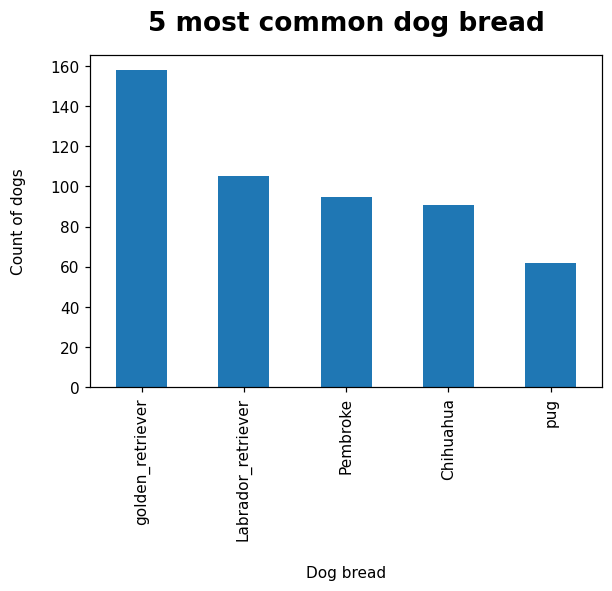

In [79]:
plt.figure(figsize=[6,4],dpi = 110)

clean_df.dog_bread.value_counts().nlargest(5).plot(kind='bar')
plt.xlabel("Dog bread",labelpad=16)
plt.ylabel("Count of dogs", labelpad=16)
plt.title("5 most common dog bread", pad=16,fontsize= 'xx-large',fontweight= 'semibold');

#### Dog breads with highest average rating

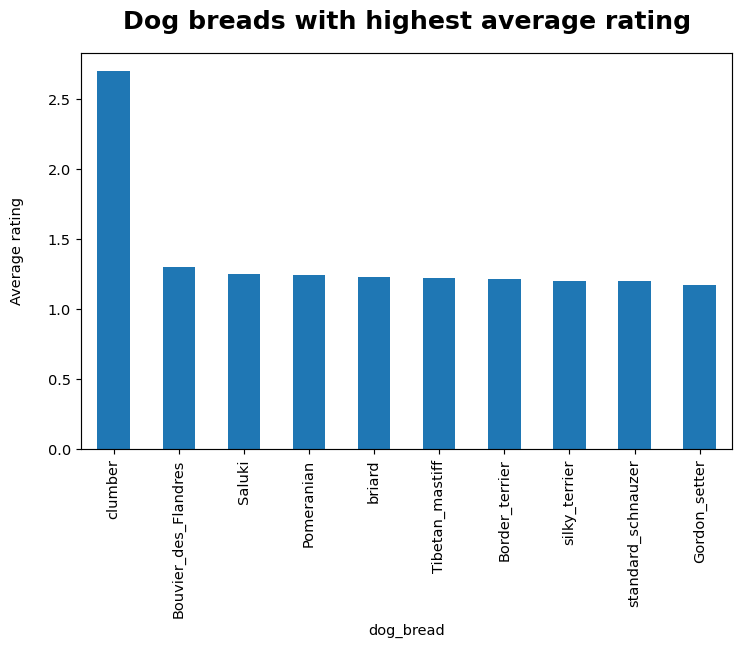

In [80]:
plt.figure(figsize=[8,5],dpi = 105)

clean_df.groupby('dog_bread').dog_rating.mean().nlargest(10).plot(kind='bar') # .value_counts().nlargest(10).plot(kind='bar')

#plt.ylim(ymin=1)
plt.ylabel("Average rating", labelpad=16)
plt.title("Dog breads with highest average rating", pad=16,fontsize= 'xx-large',fontweight= 'semibold');


In [81]:
# an image of dumber bread



#### Proportion of Dog stages

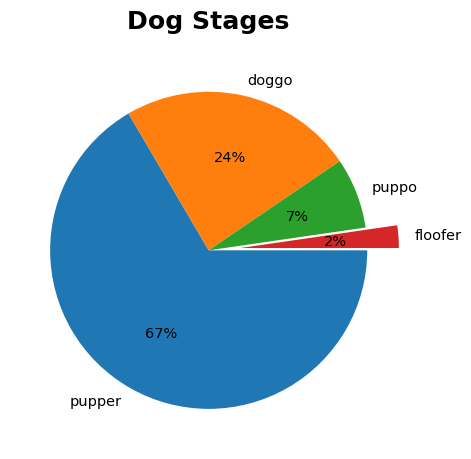

In [82]:
plt.figure(figsize=[8,5],dpi = 105)

dogStage = clean_df.dog_stage.value_counts()  #.plot(kind='pie')

plt.pie(dogStage, labels = dogStage.index,autopct='%.0f%%',explode = [0,0,0,0.2],
        counterclock = False);
plt.title("Dog Stages", pad=16,fontsize= 'xx-large',fontweight= 'semibold');

#### Is there a correlation retweets and favourite count?

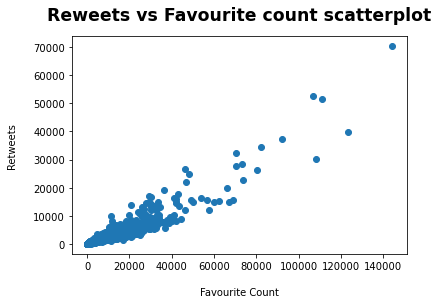

In [83]:
plt.scatter(x=clean_df.favorite_count, y=clean_df.retweet_count)
plt.xlabel("Favourite Count",labelpad=16)
plt.ylabel("Retweets", labelpad=16)
plt.title("Reweets vs Favourite count scatterplot", pad=16,fontsize= 'xx-large',fontweight= 'semibold');

There seems to be a correlation between retweets and favourite count